# Linear Regression:
                Linear regression is one of the easiest algorithms in Machine learning. Linear regression is a way to express relationship between an independent variable and a dependent variable. We have to find a linear model that is as accurate as possible which will predict the dependent variable as a function of independent variable.

# Hypothesis:
    Our hypothesis in the linear regression case will be a function that will mape the independent values to the dependent values.
\begin{align}
\dot h_x & = \theta_0 + \theta_1X
\end{align}

    This is for univariable we can extend it to multiple variable
In this the X is the independent variable which is also called feature and output $ h_x $ is the dependent variable which is also called the prediction.

In [1]:
#first i imported my dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

In [2]:
def hypothesis(x, theta):
    return np.dot(x, theta[1:]) + theta[0]

Now that we have implemented the hypothesis function using python lets test it using arbitrary data.

We have one column only containing one because we of $\theta_0$

In [3]:
theta = [0, 0.5]
x = np.array([1, 2, 3, 4, 5])
x = x.reshape(len(x), 1)
y = [1, 2, 3, 4, 5]
y_predicted = hypothesis(x, theta)
y_predicted

array([0.5, 1. , 1.5, 2. , 2.5])

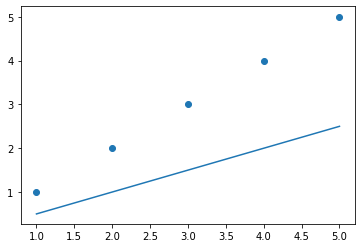

In [4]:
plt.scatter(x, y)
plt.plot(x, y_predicted)

# Cost: 
    Cost is the difference between the actual value and the predicted. The total cost is equal to the sum of all the costs.
As we chose just random values for the $ \theta_0 and \theta_1 $ it does fit well through the data. To make the model work fine we have to chose those values for $ \theta_0 and \theta_1 $ that will reduce this cost function.
$$ \ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)})^2 $$
Now we have to find $ \theta_0 and \theta_1 $ which give small cost.

### Hypothesis:

\begin{align}
\dot h_x & = \theta_0 + \theta_1X
\end{align}
### Parameter:

$$ \theta_0 and \theta_1 $$
### Cost Function:

$$ \ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) $$

### Goal: 

$$ Minimize  \ J(\theta_0, \theta_1)  using  \theta_0 and \theta_1 $$

![title](image/cost.jpeg)

Lets try some arbitrary values for $$\theta_0 and \theta_1 $$ and find out the cost.

For this we have to implement the cost function first.

In [5]:
def cost(y_given, y_predicted):
    return ((y_predicted - y_given)**2).mean()/2

In [6]:
y_predicted = []
t_cost = []
theta = []

In [7]:
for i in range(20):
    Q_theta = [0, i/10]
    Q_predicted = hypothesis(x, Q_theta)
    Q_cost = cost(y, Q_predicted)
    
    y_predicted.append(Q_predicted)
    theta.append(Q_theta[1])
    t_cost.append(Q_cost)

    The below graph shows different linear model on the data.

In [9]:
fig = go.Figure(
    data=[go.Scatter(x=x.reshape(len(x)), y=y,
                     mode="markers",
                     name='Linar-model',
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x.reshape(len(x)), y=y,
                     mode="markers",
                     name='Data',
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[0, 6], autorange=False, zeroline=False),
        yaxis=dict(range=[0, 6], autorange=False, zeroline=False),
        title_text="Fitting the line through the data", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
      frames=[go.Frame(
        data=[go.Scatter(
            x=x.reshape(len(x)),
            y=y_predicted[k],
            mode="lines",
            line=dict(color="red", width=2))
        ]) for k in range(20)]
)

fig.show()

    The above graph show how a line is fitted through the data. The below graph show the error in the original and the predicted data as the line changes its possitions.

In [10]:
fig = go.Figure(
    data=[go.Scatter(x=theta[:3], y=t_cost[:3],
                     mode="markers",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[0, 2], autorange=False, zeroline=False),
        yaxis=dict(range=[0, 3], autorange=False, zeroline=False),
        title_text="The cost ", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
      frames=[go.Frame(
        data=[go.Scatter(
            x=theta[:k],
            y=t_cost[:k],
            mode="lines",
            line=dict(color="red", width=2))
        ]) for k in range(3, 20)]
)

fig.show()

     As the graph above show the cost become very low at a certain point, we have to find that point, In this case we can find it just by looking at the graph but in high dimentional figure it become hard for us to find it manually just by looking at the figure. So we need an algorithm to find this.
## Gradient Descent:
Gradient descent is just an algorithm that minimize some arbitrary function $ \ J(\theta_0, \theta_1) $. There could be many $\theta $ not just two like $ J(\theta_0, \theta_1, \theta_2, \theta3, ....) $

Now we have some function $ \ J(\theta_0, \theta_1) $ and what we want is to minimize it.
### Outline:
* Start with some $\theta_0 and \theta_1 $.
* keep changing $\theta_0 and \theta_1 $ to reduce $ J(\theta_0, \theta_1)$ untill hopefully we endup at a minimum.
### Algorithm:
    The algrithm of Gradient Desent.
Repeat until convergence {

$$ \theta_j := \theta_j - \alpha \frac{\mathrm{d}}{\mathrm{d}\theta_j}J(\theta_0, \theta_j) $$
}

$$ \theta_j := \theta_j - \alpha \frac{\mathrm{d}}{\mathrm{d}\theta_j}\frac{1}{2m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)})^2 $$

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) x^{i}_j $$

* := is the assignment operator.
* $\alpha$ is the learning rate
* $\frac{\mathrm{d}}{\mathrm{d}\theta_j}J(\theta_0, \theta_j) $ is the derivative of the cost function which means we are taking small steps towards the local minimum. Local minimum is the point where the cost is low.
* Gradient descent can converge to local minimum even with the learing rate $\alpha$ fixed.
* As we approach the local minimum , gradient descent will automatically take smaller steps. So no need to decrease $\alpha$ over time.

        Lets give it a shape of a class to make things simple

In [11]:
class MyLinearRegression():
    def __init__(self, no_of_attrs, alpha = 0.003, iteration=100):
        self.alpha = alpha
        self.theta = np.zeros(no_of_attrs)
        self.t_cost = []
        self.iter = iteration
        pass
    def fit(self, x_train, y_train):
        if len(self.theta) == 1:
            self.x = x_train.reshape(len(x_train), 1)
        else:
            self.x =  x_train
        for i in range(self.iter):
            Q_cost = self.cost(y_train)
            self.t_cost.append(Q_cost)
            self.GradientDescent(y_train)
            if i%100 == 0:
                print(i, "Epoch completed with cost:", Q_cost)
    def hypothesis(self, x_value):
        return np.dot(x_value, self.theta)
    def cost(self, y_train):
        return ((self.hypothesis(self.x) - y_train)**2).mean()/2
    def cost_der(self, y_given):
        cost = (self.hypothesis(self.x) - y_given)
        cost = cost*self.x.T
        cost = np.mean(cost)
        return cost
    def GradientDescent(self, y_given):
        gr = self.cost_der(y_given)
        self.theta = self.theta - self.alpha*gr
    def predict(self, x_test):
        return np.dot(x_test.reshape(len(x_test), len(self.theta)), self.theta)
    def evaluate(self, x_test, y_test):
        rmse = np.sqrt(((self.hypothesis(x_test.reshape(len(x_test), len(self.theta))) - y_test)**2).mean())
        return rmse

In [12]:
x_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([1, 2, 3, 4, 5])
lin_reg = MyLinearRegression(no_of_attrs = 1, iteration=1000)
lin_reg.fit(x_train, y_train)

0 Epoch completed with cost: 5.5
100 Epoch completed with cost: 0.006693565323578855
200 Epoch completed with cost: 8.146148498364536e-06
300 Epoch completed with cost: 9.913959474383236e-09
400 Epoch completed with cost: 1.2065406426390142e-11
500 Epoch completed with cost: 1.4683742941325664e-14
600 Epoch completed with cost: 1.7870290983331387e-17
700 Epoch completed with cost: 2.1748237247855532e-20
800 Epoch completed with cost: 2.646663236839239e-23
900 Epoch completed with cost: 3.221322011376636e-26


In [13]:
x = np.arange(100)
fig = go.Figure(
    data=[go.Scatter(x=x[:3], y=lin_reg.t_cost[:3],
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[0, 100], autorange=False, zeroline=False),
        yaxis=dict(range=[0, 2], autorange=False, zeroline=False),
        title_text="The cost of the model per iteration", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
      frames=[go.Frame(
        data=[go.Scatter(
            x=x[:k],
            y=lin_reg.t_cost[:k],
            mode="lines",
            line=dict(color="red", width=2))
        ]) for k in range(3, 100)]
)

fig.show()

### Making sure the model is working fine:
* If $\ J(\theta)$ is not converging it means gradient descent is not working. Try changing the $\alpha$.
* If $\alpha$ is too small, gradient descent can be slow to converge.
* I $\alpha$ is too large $\ J(\theta)$ may not decrease and the model will not converge.
* Chose alpha between $ 0.001 and 0.3$. It depends on the problem mostly.

In [14]:
#Lets cheack the model by predicting a value other than the training data
x = np.array([6, 7, 8])
result = lin_reg.predict(x)

In [15]:
result

array([6., 7., 8.])

        The result is 100% accurate.
## Performance measure:
    The next thing is that we have to select a performance. The typical performance measure for regression problem is Root Mean Square Method RMSE. It measures the standard deviation of the errors the system makes in its predictions. In our example we have used RMSE.
    
    
$$ RMSE(X, H) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})^2} $$

* $ m $ is the number of instances .
* $X^{(i)}$ is the vector of all feature values of the $ith$ instance of the dataset.
* $y^{(i)} $ is it labels, the desired values for that instance.

In [16]:
x_test = np.array([6, 7, 8, 9, 10])
y_test = np.array([6, 7, 8, 9, 10])
lin_reg.evaluate(x_test, y_test)

2.2741530499570502e-14

        The error is very small so our model is working fine

## Linear Regression usin scikit-learn

In [17]:
x_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([1, 2, 3, 4])
x_test = np.array([[6, 7], [7, 8], [8, 9], [9, 10]])
y_test = np.array([6, 7, 8, 9])

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
lng = LinearRegression().fit(x_train, y_train)

In [21]:
lng.score(x_test, y_test)

1.0

## Linear Regression using Tensorflow

In [1]:
import tensorflow as tf
import numpy as np

In [41]:
x_data = np.random.randn(2000, 6)
w_real = [0.4,0.6,0.3, 0.2, 0.9, 1]
b_real = -0.5
y_data = np.matmul(w_real, x_data.T) + b_real

In [46]:
NUM_STEPS = 5
w_ = []
g = tf.Graph()
loss_ = []
with g.as_default():
    x = tf.placeholder(tf.float32)
    y_true = tf.placeholder(tf.float32)
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0, 0, 0, 0, 0, 0]], dtype=tf.float32, name='weights')
        b = tf.Variable(0, dtype=tf.float32, name='bias')
        y_pred = tf.matmul(w, tf.transpose(x)) + b
    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true - y_pred))
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(train, {x:x_data, y_true:y_data})
            if step%2 == 0:
                print(step, sess.run([w, b]))
                w_.append(sess.run([w, b]))
            loss_.append(sess.run(loss, {x:x_data, y_true:y_data}))
        print(5, sess.run([w, b]))

0 [array([[0.30013746, 0.5993727 , 0.26156157, 0.25131458, 0.8087102 ,
        0.9860471 ]], dtype=float32), -0.47960034]
2 [array([[0.39872503, 0.59999704, 0.29970193, 0.20045543, 0.8988761 ,
        0.9995887 ]], dtype=float32), -0.49975953]
4 [array([[0.3999836 , 0.60000014, 0.29999742, 0.20000502, 0.8999861 ,
        0.9999929 ]], dtype=float32), -0.4999975]
5 [array([[0.3999836 , 0.60000014, 0.29999742, 0.20000502, 0.8999861 ,
        0.9999929 ]], dtype=float32), -0.4999975]


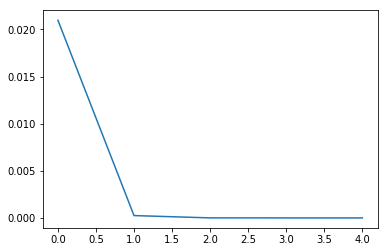

In [47]:
import matplotlib.pyplot as plt
plt.plot(np.arange(NUM_STEPS), loss_)

         The weights mathced with the real weights and biases, Means the model is working.

In [ ]:
x